In [1]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import ncar_jobqueue
from numpy.polynomial import polynomial as P

import data_catalog
import tseries_mod
from utils import time_year_plus_frac

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')
regions = ['Global']

active catalog: experiments


In [3]:
def polyfit_summary(t, y):
    pf0, stats0 = P.polyfit(t, y, 0, full=True)
    pf1, stats1 = P.polyfit(t, y, 1, full=True)
    mean = pf0[0]
    slope = pf1[1]
    var_expl = 1.0 - stats1[0][0] / stats0[0][0]
    print(f'    mean={mean}, slope={slope}, variance explained={var_expl}')

def Cinv_lnd_drift_summary(experiment, varnames = ['TOTECOSYSC', 'XSMRPOOL']):
    ds_ann = tseries_mod.tseries_get_vars(varnames, 'lnd', experiment, freq='ann')
    for region in regions:
        y_sum = None
        for varname in varnames:
            title = ' '.join([experiment, varname, region])
            tseries_mod.tseries_plot_1ds(ds_ann, [varname], title=title, region_val=region)
            t = time_year_plus_frac(ds_ann, 'time')
            y = ds_ann[varname].sel(region=region).values
            print(f'summary for {varname}')
            polyfit_summary(t, y)
            y_sum = y if y_sum is None else y_sum + y
        # assume t from last varname is applicable
        print(f'summary for sum over vars')
        polyfit_summary(t, y_sum)

summary for TOTECOSYSC
    mean=2531.2470043945314, slope=-0.027335278313978553, variance explained=0.9664112188688341
summary for XSMRPOOL
    mean=-4.799833798408508, slope=-1.5653659617359076e-05, variance explained=0.018622314494713854
summary for sum over vars
    mean=2526.4471691894523, slope=-0.027350936368596403, variance explained=0.9665751893961071


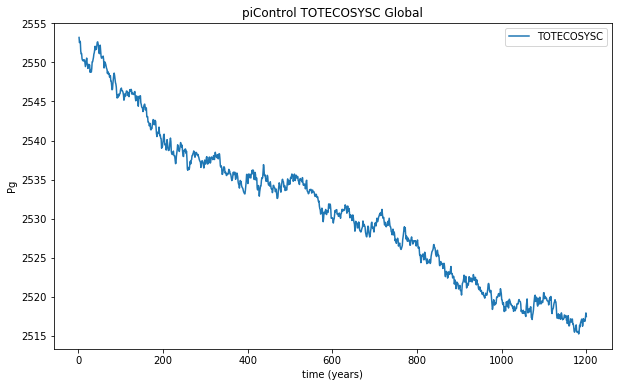

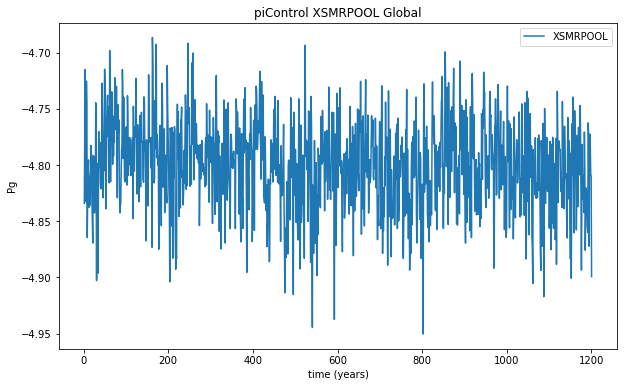

In [4]:
Cinv_lnd_drift_summary(experiment='piControl')

summary for TOTECOSYSC
    mean=2526.612015534977, slope=-0.07164542792725201, variance explained=0.9214466212878821
summary for XSMRPOOL
    mean=-4.785722509892527, slope=2.7014783720890207e-05, variance explained=0.009960199531272695
summary for sum over vars
    mean=2521.826287829566, slope=-0.07161842415961142, variance explained=0.9219403650688424


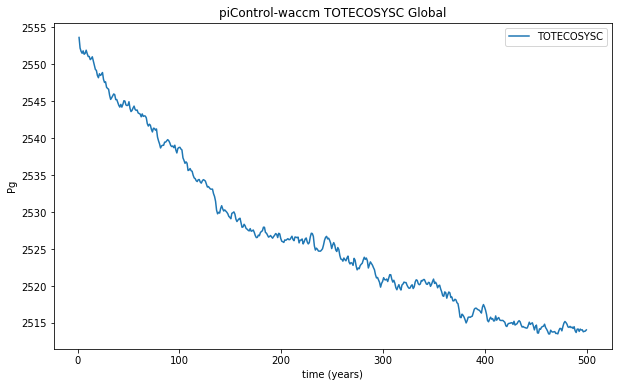

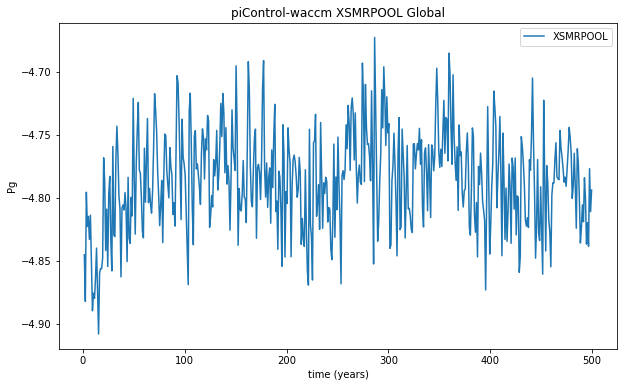

In [5]:
Cinv_lnd_drift_summary(experiment='piControl-waccm')

summary for TOTECOSYSC
    mean=2535.3768920898447, slope=-0.008253091490988487, variance explained=0.06902869383847698
summary for XSMRPOOL
    mean=-4.79842410683632, slope=-0.0003623849229683234, variance explained=0.04785100355334759
summary for sum over vars
    mean=2530.5784576416027, slope=-0.00861533353606, variance explained=0.07657423701717558


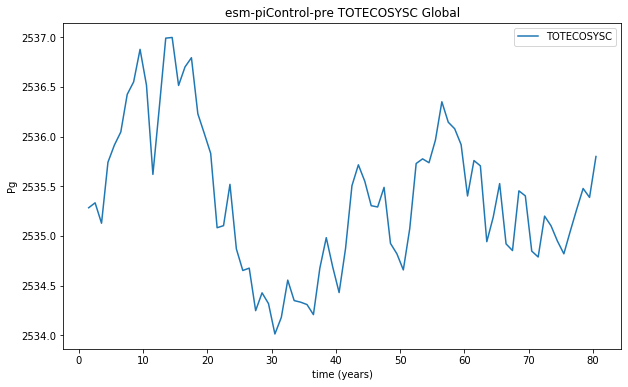

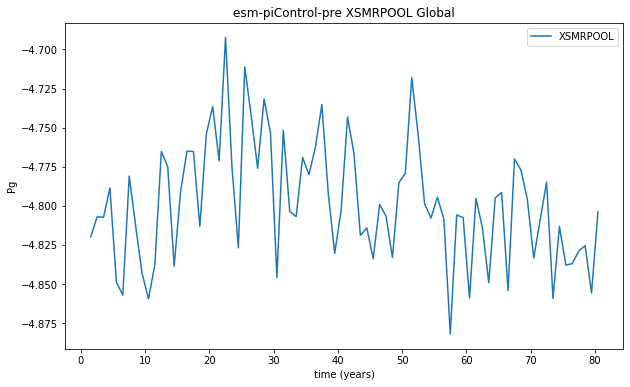

In [6]:
Cinv_lnd_drift_summary(experiment='esm-piControl-pre')

summary for TOTECOSYSC
    mean=2105.6224672851567, slope=0.0021729990943315336, variance explained=0.06937063139013078
summary for XSMRPOOL
    mean=-4.834277079582214, slope=-5.8367544362172545e-05, variance explained=0.046326571813933404
summary for sum over vars
    mean=2100.788190917968, slope=0.00211465136876702, variance explained=0.06619979784928987


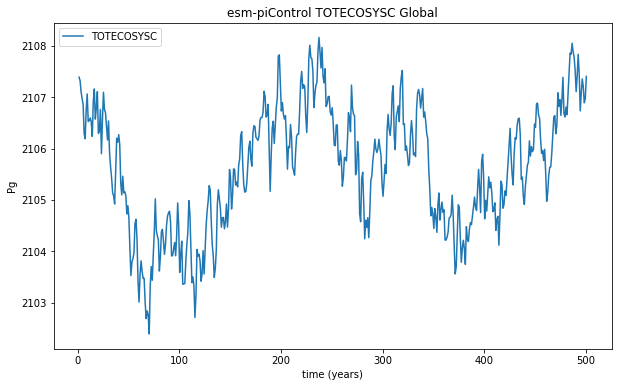

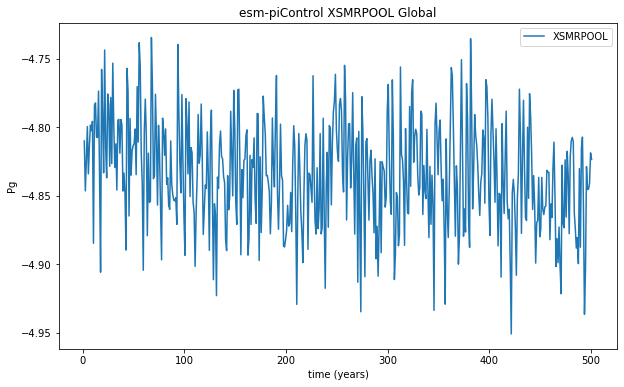

In [7]:
Cinv_lnd_drift_summary(experiment='esm-piControl')

summary for TOTECOSYSC
    mean=1174.6838078613287, slope=0.01051320785213101, variance explained=0.8232675234320241
summary for XSMRPOOL
    mean=-7.406013689041141, slope=-1.1932162299840432e-05, variance explained=0.0017787941347885416
summary for sum over vars
    mean=1167.2777944335942, slope=0.010501271670839384, variance explained=0.8268744393890104


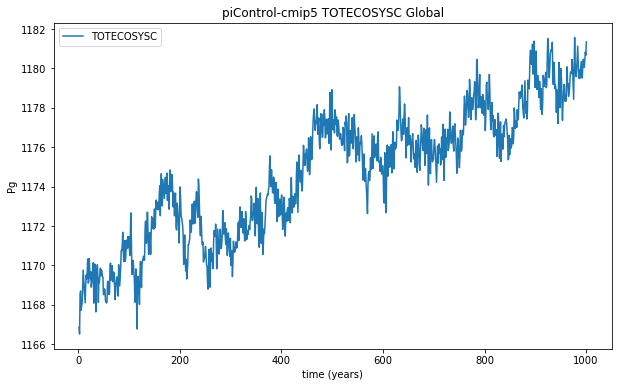

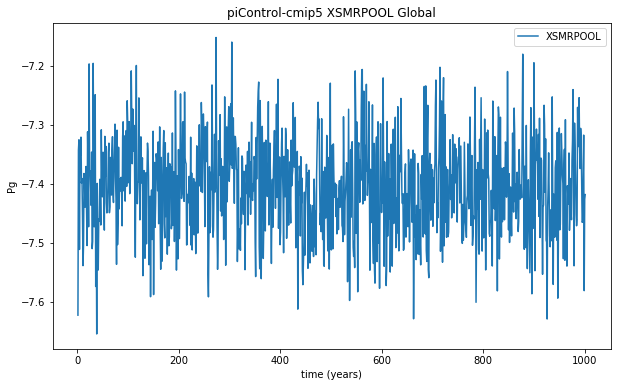

In [8]:
Cinv_lnd_drift_summary(experiment='piControl-cmip5')

summary for TOTECOSYSC
    mean=1177.7266367187508, slope=0.013319918751706433, variance explained=0.8080892891110236
summary for XSMRPOOL
    mean=-7.402136200428011, slope=-1.752800559194331e-05, variance explained=0.004204703939358678
summary for sum over vars
    mean=1170.3245012207037, slope=0.013302389026715293, variance explained=0.8094479040683481


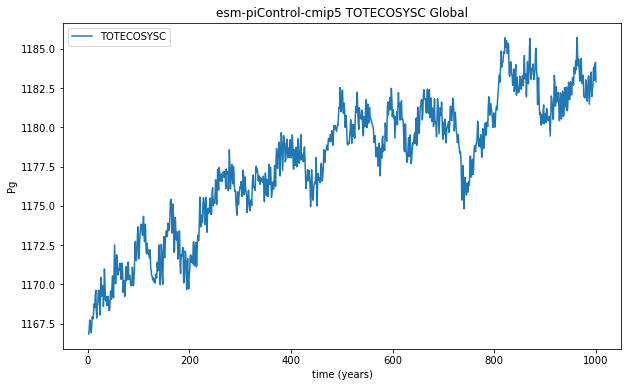

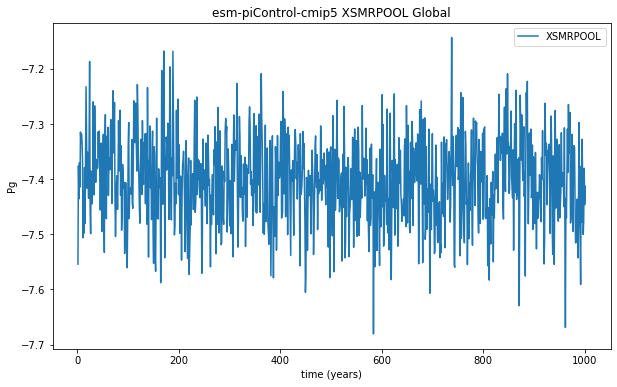

In [9]:
Cinv_lnd_drift_summary(experiment='esm-piControl-cmip5')